<a href="https://colab.research.google.com/github/musicjae/intro_to_python/blob/master/Pytorch/pytorch_tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References  
[1]  https://github.com/gyunggyung/PyTorch

# 1 MNIST를 이용한 신경망

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torch.nn.init
from torch.autograd import Variable
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms
torch.manual_seed(8)
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [4]:
mnist_train = dsets.MNIST(root='/content/drive/My Drive/datasets/pytorch_basic/data/MNIST/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='/content/drive/My Drive/datasets/pytorch_basic/data/MNIST/',
                         train=False, # testset
                         transform=transforms.ToTensor(),
                         download=True)

In [5]:
mnist_train.train_data.size()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Text(0.5, 1.0, '5')

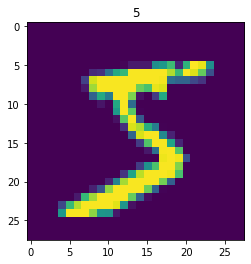

In [12]:
plt.imshow(mnist_train.train_data[0].numpy())
plt.title('%i' % mnist_train.train_labels[0])

### 1.1 데이터 로드

In [13]:
batch_size = 100
data_loader = torch.utils.data.DataLoader(
    dataset = mnist_train,
    batch_size = batch_size,
    shuffle = True,
    num_workers = 4
)

#### 데이터 이미지 확인

In [44]:
batch_img, batch_labels = next(iter(data_loader))
print(batch_img.size())
print(batch_label.size())

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [15]:
type(batch_img)

torch.Tensor

torch.Size([100, 1, 28, 28])
torch.Size([100])


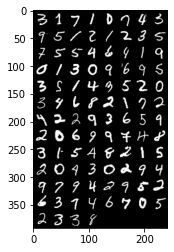

array([3, 1, 7, 1, 0, 7, 4, 3, 9, 5, 1, 2, 1, 2, 3, 5, 7, 5, 5, 4, 6, 4,
       1, 9, 0, 1, 3, 0, 9, 6, 9, 5, 3, 5, 1, 4, 3, 5, 2, 0, 3, 4, 6, 8,
       2, 1, 7, 2, 4, 2, 2, 9, 3, 6, 5, 9, 2, 0, 6, 9, 9, 7, 4, 8, 3, 1,
       5, 4, 8, 2, 1, 5, 2, 0, 4, 3, 0, 2, 9, 4, 9, 7, 9, 4, 2, 9, 5, 2,
       6, 3, 7, 4, 6, 7, 0, 5, 2, 3, 3, 8])

In [43]:
def imshow(img):
    img = img / 1
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
batch_img, batch_labels = next(iter(data_loader))

print(batch_img.size())
print(batch_labels.size())

#숫자 100개 표시
imshow(utils.make_grid(batch_img))
batch_labels.numpy()

### 1.2 NN 모델 생성

In [74]:
linear1 = torch.nn.Linear(784, 512, bias=True) # 784= 28^2
linear2 = torch.nn.Linear(512,10,bias=True)
relu=torch.nn.ReLU()

model = torch.nn.Sequential(linear1,bn1,relu,linear2)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=10, bias=True)
)


### 옵티마이저

In [76]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [77]:
for i in model.parameters():
    print(i.shape)

torch.Size([512, 784])
torch.Size([512])
torch.Size([512])
torch.Size([512])
torch.Size([10, 512])
torch.Size([10])


### 손실 함수

In [78]:
loss_fn = torch.nn.CrossEntropyLoss()
# softmax 내장

### 모델 학습

In [46]:
epochs=50

for epoch in range(epochs):
    avg_cost= 0
    total_batchs = len(mnist_train) // batch_size

    for step, (batch_img, batch_labels) in enumerate(data_loader):

        X = Variable(batch_img.view(-1,28*28))
        Y = Variable(batch_labels)

        optimizer.zero_grad()
        Y_pred = model(X)

        cost = loss_fn(Y_pred, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batchs

    print("[Epoch: {:>4}] cost = {:>.9}".format(epoch + 1, avg_cost.data))
    
print("Learning Finished!")

[Epoch:    1] cost = 0.186055064
[Epoch:    2] cost = 0.0814064592
[Epoch:    3] cost = 0.0569603704
[Epoch:    4] cost = 0.0442758165
[Epoch:    5] cost = 0.0380796157
[Epoch:    6] cost = 0.0320185311
[Epoch:    7] cost = 0.0316420458
[Epoch:    8] cost = 0.0260009319
[Epoch:    9] cost = 0.026643075
[Epoch:   10] cost = 0.023093136
[Epoch:   11] cost = 0.0218624007
[Epoch:   12] cost = 0.0205315333
[Epoch:   13] cost = 0.0191082507
[Epoch:   14] cost = 0.0212672967
[Epoch:   15] cost = 0.0196516775
[Epoch:   16] cost = 0.0165324528
[Epoch:   17] cost = 0.0171034243
[Epoch:   18] cost = 0.0190319587
[Epoch:   19] cost = 0.0124021433
[Epoch:   20] cost = 0.0128030637
[Epoch:   21] cost = 0.020355979
[Epoch:   22] cost = 0.0134459212
[Epoch:   23] cost = 0.0123578105
[Epoch:   24] cost = 0.0167560671
[Epoch:   25] cost = 0.012116719
[Epoch:   26] cost = 0.015547947
[Epoch:   27] cost = 0.012633469
[Epoch:   28] cost = 0.0101837302
[Epoch:   29] cost = 0.0118849901
[Epoch:   30] cost = 

# 2 MNIST를 이용한 심층 신경망

In [2]:
import torch
import torch.nn.init
from torch.autograd import Variable

import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import random
torch.manual_seed(9)

### 2.1 데이터 로드

In [3]:
mnist_train = dsets.MNIST(root='/content/drive/My Drive/datasets/pytorch_basic/data/MNIST/',
                         train=True,
                         transform = transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='/content/drive/My Drive/datasets/pytorch_basic/data/MNIST/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

batch_size = 100

data_loader =  torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=4)

Extracting /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw


Extracting /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw


Extracting /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw


Extracting /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/My Drive/datasets/pytorch_basic/data/MNIST/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### 2.2 모델 생성

In [4]:
from torch.nn import Linear
from torch.nn import Module

In [22]:
layer1 = Linear(28*28, 512, bias= True)
layer2 = Linear(512, 512, bias= True)
layer3 = Linear(512, 512, bias= True)
layer4 = Linear(512, 512, bias= True)
layer5 = Linear(512, 256, bias= True)
layer6 = Linear(256, 128, bias= True)
layer7 = Linear(128, 10, bias= True)
selu = torch.nn.SELU()
dropout = torch.nn.Dropout()
relu=torch.nn.ReLU()

##### 모델1 using selu

In [17]:
model=torch.nn.Sequential(layer1,dropout,selu,
                          layer2,dropout,selu,
                          layer3,dropout,selu,
                          layer4,dropout,selu,
                          layer5,dropout,selu,
                          layer6,dropout,selu,
                          layer7,dropout,selu)

##### 모델2 using relu

In [35]:
model2=torch.nn.Sequential(layer1,dropout,relu,
                          layer2,dropout,relu,
                          layer3,dropout,relu,
                          layer4,dropout,relu,
                          layer5,dropout,relu,
                          layer6,dropout,relu,
                          layer7,dropout,relu)

### 2.3 옵티마이저

In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### 2.4 손실 함수

In [19]:
loss_fn = torch.nn.CrossEntropyLoss()

### 2.5 모델 학습

In [20]:
for epoch in range(50):

    avg_cost=0
    total_batchs = len(mnist_train) // batch_size

    for i, (batch_img, batch_labels) in enumerate(data_loader): # 데이터로더에서 배치 단위로 각 배치를 조사

        X = Variable(batch_img.view(-1,28*28))
        Y = Variable(batch_labels)

        optimizer.zero_grad()
        Y_pred = model(X)
        cost = loss_fn(Y_pred, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batchs

    print("[Epoch: {:>4}] cost  = {:>.9}".format(epoch+1, avg_cost.data))
    
print('Learning Finished')

[Epoch:    1] cost  = 89.1588898
[Epoch:    2] cost  = 16.2186584
[Epoch:    3] cost  = 2.61812639
[Epoch:    4] cost  = 2.6225183
[Epoch:    5] cost  = 2.6238935
[Epoch:    6] cost  = 2.62349844
[Epoch:    7] cost  = 5.3628912
[Epoch:    8] cost  = 337.871094
[Epoch:    9] cost  = 2.61866379
[Epoch:   10] cost  = 2.62214541
[Epoch:   11] cost  = 2.6166234
[Epoch:   12] cost  = 123.770302
[Epoch:   13] cost  = 2.6184032
[Epoch:   14] cost  = 2.61592221
[Epoch:   15] cost  = 53.1939316
[Epoch:   16] cost  = 191.165558
[Epoch:   17] cost  = 2.62039471
[Epoch:   18] cost  = 2.62100315
[Epoch:   19] cost  = 2.61930799
[Epoch:   20] cost  = 2.61975265
[Epoch:   21] cost  = 2.61772537
[Epoch:   22] cost  = 2.62106466
[Epoch:   23] cost  = 49.9879265
[Epoch:   24] cost  = 2.61867929
[Epoch:   25] cost  = 2.62246966
[Epoch:   26] cost  = 2.62267852
[Epoch:   27] cost  = 2.61904407
[Epoch:   28] cost  = 2.6149497
[Epoch:   29] cost  = 2.61425424
[Epoch:   30] cost  = 2.61827731
[Epoch:   31] co

# 3 MNIST를 이용한 CNN 신경망

In [21]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import os

### 3.1 데이터 로드

In [ ]:
batch_size=100

In [51]:
train_dataset = dsets.MNIST(root='/content/drive/My Drive/datasets/pytorch_basic/data/MNIST/',
                            train = True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset=dsets.MNIST(
    root='/content/drive/My Drive/datasets/pytorch_basic/data/MNIST/',
    train=False,
    transform = transforms.ToTensor())

In [84]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size)

### 3.2 모델 생성



```
torch.nn.Conv2d(
    in_channels: int, 
    out_channels: int, 
    kernel_size: Union[T, Tuple[T, T]], 
    stride: Union[T, Tuple[T, T]] = 1, 
    padding: Union[T, Tuple[T, T]] = 0, 
    dilation: Union[T, Tuple[T, T]] = 1, 
    groups: int = 1, bias: bool = True, 
    padding_mode: str = 'zeros')
```



In [86]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1,16,kernel_size=5,padding=(2,2)),
            nn.MaxPool2d(2),
            nn.ReLU(2),
            nn.BatchNorm2d(16))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32,kernel_size=5,padding=(2,2)), #  # 가중치 개수: 16(필터개수)x5x5
                                                               # 필터마다 고유한 특징을 뽑아 고유한 출력 이미지로 만들기 때문에 필터의 출력값을 더해서 하나의 이미지로 만들거나 그렇게 하지 않습니다.                                                       #
            nn.MaxPool2d(2), # 32*7*7
            nn.ReLU(),
            nn.BatchNorm2d(32))
        
        self.fc = nn.Linear(32*7*7,10)
        
    def forward(self, x):

        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0),-1) # flattening
        out = self.fc(out)

        return out

In [87]:
cnn = CNN()

### 3.3 모델 학습

In [88]:
loss_list=[]

In [89]:
criterion = nn.CrossEntropyLoss() # Loss
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.01)

for epoch in range(30):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)
            
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
            
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'%(epoch+1, 30, i+1, len(train_dataset)//batch_size, loss.data))


    loss_list.append(loss.data)

Epoch [1/30], lter [100/600] Loss: 0.0783
Epoch [1/30], lter [200/600] Loss: 0.0263
Epoch [1/30], lter [300/600] Loss: 0.1188
Epoch [1/30], lter [400/600] Loss: 0.0290
Epoch [1/30], lter [500/600] Loss: 0.0116
Epoch [1/30], lter [600/600] Loss: 0.1076
Epoch [2/30], lter [100/600] Loss: 0.0218
Epoch [2/30], lter [200/600] Loss: 0.0265
Epoch [2/30], lter [300/600] Loss: 0.0488
Epoch [2/30], lter [400/600] Loss: 0.0928
Epoch [2/30], lter [500/600] Loss: 0.0057
Epoch [2/30], lter [600/600] Loss: 0.0209
Epoch [3/30], lter [100/600] Loss: 0.0416
Epoch [3/30], lter [200/600] Loss: 0.0017
Epoch [3/30], lter [300/600] Loss: 0.1263
Epoch [3/30], lter [400/600] Loss: 0.0849
Epoch [3/30], lter [500/600] Loss: 0.0248
Epoch [3/30], lter [600/600] Loss: 0.0282
Epoch [4/30], lter [100/600] Loss: 0.0262
Epoch [4/30], lter [200/600] Loss: 0.0479
Epoch [4/30], lter [300/600] Loss: 0.0110
Epoch [4/30], lter [400/600] Loss: 0.0009
Epoch [4/30], lter [500/600] Loss: 0.0084
Epoch [4/30], lter [600/600] Loss:

In [90]:
len(loss_list)

30

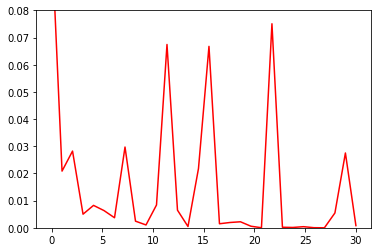

In [94]:
X = np.linspace(0,30,30)
plt.plot(X,loss_list, c='red')
plt.ylim((0.000,0.08))
plt.show()

### 3.4 평가

In [95]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('test Accuracy 10000 test images  = %f %%' % (100 * correct/total))

test Accuracy 10000 test images  = 98.639999 %
